In [39]:
import yfinance as yf
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [21]:
df = yf.download("^GSPC", start = "2015-01-01")[["Adj Close"]]

[*********************100%***********************]  1 of 1 completed


In [22]:
df

,Adj Close
Date,
2015-01-02,2058.199951
2015-01-05,2020.579956
2015-01-06,2002.609985
2015-01-07,2025.900024
2015-01-08,2062.139893
...,...
2022-10-13,3669.909912
2022-10-14,3583.070068
2022-10-17,3677.949951


In [23]:
df=df.pct_change()
print(df)

            Adj Close
Date                 
2015-01-02        NaN
2015-01-05  -0.018278
2015-01-06  -0.008893
2015-01-07   0.011630
2015-01-08   0.017888
...               ...
2022-10-13   0.025966
2022-10-14  -0.023663
2022-10-17   0.026480
2022-10-18   0.011428
2022-10-19  -0.006672

[1964 rows x 1 columns]


[*********************100%***********************]  1 of 1 completed
average positive returns of ^GSPC
average safe cut off point, with minimum 0.003 % return
0.010412151216720681
Line2D(_child1)


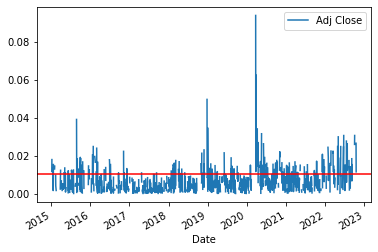

In [71]:
def retCut(stock: str, minRet:float)->float:
    df = yf.download(stock, start = "2015-01-01")[["Adj Close"]]
    df=df.pct_change()
    print(f"average positive returns of {stock}")
    df[df>0].plot()
    #which values are likely to occur, distribution, range of most values(+ and -), 
    print(f"average safe cut off point, with minimum {minRet} % return" )
    print(df[df>minRet].mean()[0])
    return plt.axhline(df[df>minRet].mean()[0], color='r')
print(retCut("^GSPC",0.003))


[*********************100%***********************]  1 of 1 completed
average losses of ^GSPC
average safe cut off point, with maximum 0.003 % loss
-0.011841313364218481
Line2D(_child1)


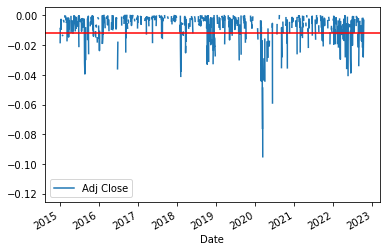

In [76]:
def lossCut(stock: str, maxLoss:float)->float:
    df = yf.download(stock, start = "2015-01-01")[["Adj Close"]]
    df=df.pct_change()
    print(f"average losses of {stock}")
    df[df<0].plot()
    #which values are likely to occur, distribution, range of most values(+ and -), 
    print(f"average safe cut off point, with maximum {maxLoss} % loss" )
    print(df[df<-maxLoss].mean()[0])
    return plt.axhline(df[df<-maxLoss].mean()[0], color='r')
print(lossCut("^GSPC",0.003))


In [61]:
df[df>0.003].mean()[0]

0.010412151216720681